In [48]:
print("Hello world")

Hello world


In [49]:
import networkx as nx
import numpy as np
from scipy.stats import norm, gaussian_kde
from scipy.integrate import quad
import pymc as pm


In [50]:
from scipy.stats import entropy

def kl_divergence(p, q):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Calculez les histogrammes des deux distributions
    bins = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 1000)
    p_hist, _ = np.histogram(p, bins=bins, density=True)
    q_hist, _ = np.histogram(q, bins=bins, density=True)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_hist += epsilon
    q_hist += epsilon
    
    # Normalisez les histogrammes
    p_hist /= np.sum(p_hist)
    q_hist /= np.sum(q_hist)
    
    # Calculez la divergence KL
    return entropy(p_hist, q_hist)

from scipy.stats import gaussian_kde

def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))



def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))




New model

In [51]:
import jax # type: ignore
print(jax.devices())

[CudaDevice(id=0)]


In [52]:
import sys
print(sys.executable)
print(sys.path)

/usr/bin/python3
['C:\\Program Files\\JetBrains\\PyCharm 2024.1.4\\plugins\\python\\helpers-pro\\jupyter_debug', 'C:\\Program Files\\JetBrains\\PyCharm 2024.1.4\\plugins\\python\\helpers\\pydev', '/root/temp_janis_test_parallellization', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor']


In [53]:
import jax

In [54]:
import numpy as np

In [55]:
import pymc as pm


In [56]:
import json

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [57]:

# Usage
n_schools = 150
n_students = 150
graph = [('a', '_b'), ('a', 'c'), ('_b', 'c'), ('c', '_d'), ('_b', '_d'), ('_d', 'e'), ('c', 'e')]
data = load_data_from_json('data/sampled_data.json')


# Convert data to numpy arrays
a = np.array([data[f'a{i}'] for i in range(n_schools)])
c = np.array([data[f'c{i}'] for i in range(n_schools)])
e = np.array([data[f'e{i}'] for i in range(n_schools)])

# For b and d, we need to create 2D arrays
b = np.array([[data[f'_b{i}_{j}'] for j in range(n_students)] for i in range(n_schools)])
d = np.array([[data[f'_d{i}_{j}'] for j in range(n_students)] for i in range(n_schools)])

print("Shape of a:", a.shape)
print("Shape of b:", b.shape)
print("Shape of c:", c.shape)
print("Shape of d:", d.shape)
print("Shape of e:", e.shape)
print(data['_b1_2'])
print(b[1, 2])

Data successfully loaded from data/sampled_data.json
Shape of a: (150,)
Shape of b: (150, 150)
Shape of c: (150,)
Shape of d: (150, 150)
Shape of e: (150,)
0.30047647636831515
0.30047647636831515


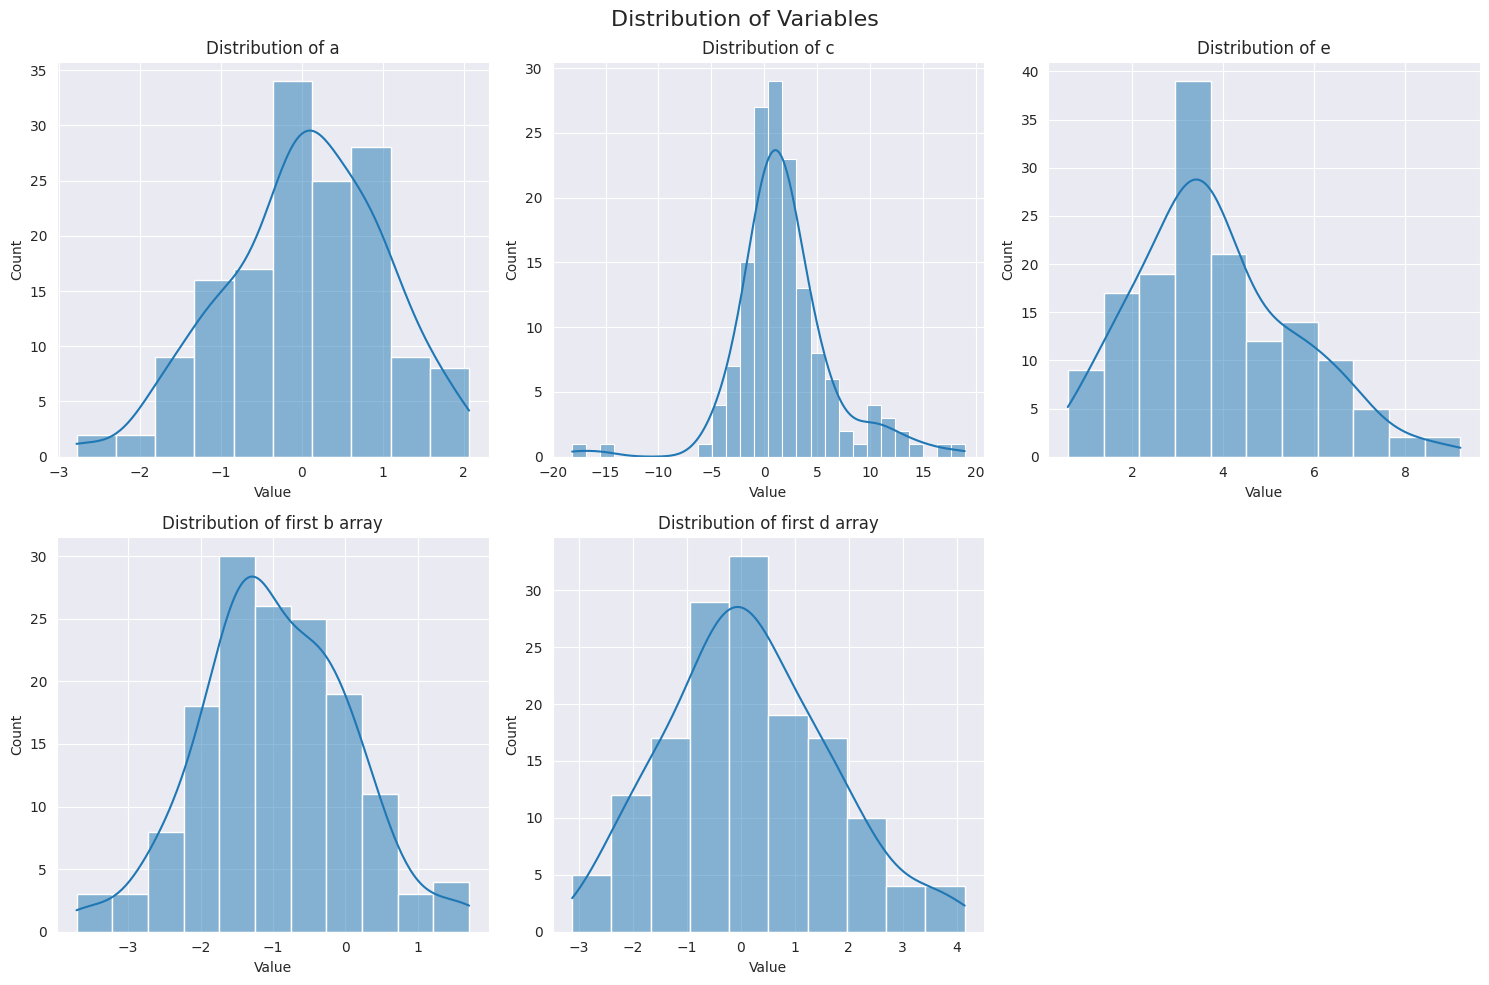

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Variables', fontsize=16)

# Plot distribution of a
sns.histplot(a, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of a')
axes[0, 0].set_xlabel('Value')

# Plot distribution of c
sns.histplot(c, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of c')
axes[0, 1].set_xlabel('Value')

# Plot distribution of e
sns.histplot(e, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of e')
axes[0, 2].set_xlabel('Value')

# Plot distribution of first b array
sns.histplot(b[0], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of first b array')
axes[1, 0].set_xlabel('Value')

# Plot distribution of first d array
sns.histplot(d[0], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of first d array')
axes[1, 1].set_xlabel('Value')

# Remove the unused subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


In [59]:
print(jax.devices())

[CudaDevice(id=0)]


In [60]:
import pymc as pm
import jax
print(jax.devices())
#import multiprocessing
#multiprocessing.set_start_method('spawn', force=True)

[CudaDevice(id=0)]


In [61]:
with pm.Model() as model:
    # Priors pour les coefficients (au niveau des écoles)
    mu_A = pm.Normal('mu_A', mu=0, sigma=1)
    sigma_A = pm.HalfNormal('sigma_A', sigma=1)
    A_j = pm.Normal('A_j', mu=mu_A, sigma=sigma_A, observed=a)

    mu_C = pm.Normal('mu_C', mu=0, sigma=1)
    sigma_C = pm.HalfNormal('sigma_C', sigma=1)
    C_j = pm.Normal('C_j', mu=mu_C, sigma=sigma_C, observed=c)

    mu_E = pm.Normal('mu_E', mu=0, sigma=1)
    sigma_E = pm.HalfNormal('sigma_E', sigma=1)
    E_j = pm.Normal('E_j', mu=mu_E, sigma=sigma_E, observed=e)
    
    
    
    # Variables aléatoires pour les écoles
    alpha_B = pm.Normal('alpha_B', mu=0, sigma=1)
    beta_B_A = pm.Normal('beta_B_A', mu=0, sigma=1)
    beta_B_C = pm.Normal('beta_B_C', mu=0, sigma=1)
    beta_B_E = pm.Normal('beta_B_E', mu=0, sigma=1)
    
    alpha_D = pm.Normal('alpha_D', mu=1, sigma=1)
    beta_D_A = pm.Normal('beta_D_A', mu=1, sigma=1)
    beta_D_C = pm.Normal('beta_D_C', mu=1, sigma=1)
    beta_D_E = pm.Normal('beta_D_E', mu=1, sigma=1)
    beta_D_A3 = pm.Normal('beta_D_A3', mu=1, sigma=1)
    beta_D_A2 = pm.Normal('beta_D_A2', mu=1, sigma=1)


    # Variables aléatoires pour les écoles
    mu_B_j = alpha_B + beta_B_A * a + beta_B_C * c + beta_B_E * e
    mu_D_j = alpha_D + beta_D_A * a + beta_D_C * c + beta_D_E * e + beta_D_A3 * a**3  + beta_D_A2 * a**2
    
    # Ajustement des dimensions pour correspondre à celles des élèves
    mu_B_j = pm.Deterministic('mu_B_j', mu_B_j[:, None])
    mu_D_j = pm.Deterministic('mu_D_j', mu_D_j[:, None])
    
    # Priors pour les écarts types au niveau des élèves
    sigma_B = pm.HalfNormal('sigma_B', sigma=1)
    sigma_D = pm.HalfNormal('sigma_D', sigma=1)
    
    # Niveau des élèves : chaque élève est modelé en fonction de son école
    B = pm.Normal('B', mu=mu_B_j, sigma=sigma_B, observed=b)
    D = pm.Normal('D', mu=mu_D_j, sigma=sigma_D, observed=d)

    # Inference
    trace = pm.sample(1000, return_inferencedata=True, progressbar=True)
    
# Analyse des résultats
print(pm.summary(trace, var_names=['alpha_B', 'beta_B_A', 'beta_B_C', 'beta_B_E','alpha_D', 'beta_D_A', 'beta_D_C', 'beta_D_E',  'sigma_B', 'sigma_D', 'beta_D_A3', 'beta_D_A2', 'mu_A', 'sigma_A', 'mu_C', 'sigma_C', 'mu_E', 'sigma_E', 'mu_B_j', 'mu_D_j']))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.031  0.022  -0.072    0.011      0.000      0.0    3004.0   
beta_B_A        0.986  0.016   0.957    1.017      0.000      0.0    2923.0   
beta_B_C        0.003  0.003  -0.003    0.009      0.000      0.0    3721.0   
beta_B_E        0.007  0.005  -0.003    0.018      0.000      0.0    3256.0   
alpha_D         0.934  0.035   0.870    1.002      0.001      0.0    2632.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.920  0.024   0.875    0.964      0.000      0.0    3095.0   
mu_D_j[146, 0]  1.185  0.014   1.158    1.212      0.000      0.0    3342.0   
mu_D_j[147, 0]  1.050  0.015   1.023    1.078      0.000      0.0    3468.0   
mu_D_j[148, 0]  0.827  0.013   0.803    0.853      0.000      0.0    3949.0   
mu_D_j[149, 0]  2.454  0.024   2.407    2.497      0.000      0.0    3963.0   

                ess_tail  r_hat  
alpha_B          

In [62]:
generated_data = {}

# a
mu_A_posterior = trace.posterior['mu_A'].mean(dim=('chain', 'draw')).values
sigma_A_posterior = trace.posterior['sigma_A'].mean(dim=('chain', 'draw')).values
new_a = np.random.normal(mu_A_posterior, sigma_A_posterior, size=n_schools)
generated_data['a'] = new_a

# c
mu_C_posterior = trace.posterior['mu_C'].mean(dim=('chain', 'draw')).values
sigma_C_posterior = trace.posterior['sigma_C'].mean(dim=('chain', 'draw')).values
new_c = np.random.normal(mu_C_posterior, sigma_C_posterior, size=n_schools)
generated_data['c'] = new_c

# e
mu_E_posterior = trace.posterior['mu_E'].mean(dim=('chain', 'draw')).values
sigma_E_posterior = trace.posterior['sigma_E'].mean(dim=('chain', 'draw')).values
new_e = np.random.normal(mu_E_posterior, sigma_E_posterior, size=n_schools)
generated_data['e'] = new_e

# b
mu_B = trace.posterior['mu_B_j'].mean(dim=('chain', 'draw')).values
sigma_B = trace.posterior['sigma_B'].mean(dim=('chain', 'draw')).values
generated_data['b'] = np.random.normal(mu_B, sigma_B)

mu_D = trace.posterior['mu_D_j'].mean(dim=('chain', 'draw')).values
sigma_D = trace.posterior['sigma_D'].mean(dim=('chain', 'draw')).values
generated_data['d'] = np.random.normal(mu_D, sigma_D)

# Affichage des formes des données générées
for var in ['a', 'b', 'c', 'd', 'e']:
    print(f"Shape of generated {var}: {generated_data[var].shape}")
    
print("Generated data:", generated_data)


Shape of generated a: (150,)
Shape of generated b: (150, 1)
Shape of generated c: (150,)
Shape of generated d: (150, 1)
Shape of generated e: (150,)
Generated data: {'a': array([ 0.01740643,  0.14409581,  0.1653004 , -1.28488072,  2.43540847,
        0.14456561,  1.12292709,  1.90786394, -0.80054171,  0.27740479,
        0.27531065, -0.6502346 , -1.0305343 , -1.68959273,  0.09557539,
        1.13021631,  0.28282453,  0.00387257,  0.0069761 ,  0.05540852,
        1.15642854, -1.29158962, -0.85068608,  1.43458208, -0.70140449,
       -2.07881679, -0.95468704, -0.72403046,  0.12518989,  1.24082697,
        1.67485895, -0.94699778,  0.34624066, -0.23941948,  0.64409464,
        0.21864904, -0.84435121,  1.13718824,  0.68868609, -1.13256202,
       -0.53222159, -0.35420109, -0.19518887, -0.79223253,  0.46982813,
        1.61623155,  1.65161861,  0.32823684,  0.88642737, -1.86730158,
       -0.82883615,  1.77787353,  0.02351804, -0.39427765, -1.04794576,
        0.003108  ,  1.29492946,  0.2

In [63]:
# Calcul des divergences KL
kl_divs = {}

for var in ['a', 'b', 'c', 'd', 'e']:
    original = eval(var)  # Les données originales
    generated = generated_data[var]  # Les données générées
    
    # Pour b et d, nous devons aplatir les arrays 2D
    if var in ['b', 'd']:
        original = original.flatten()
        generated = generated.flatten()
    
    kl_divs[var] = kl_divergence(original, generated)

# Affichage des résultats
for var, kl_div in kl_divs.items():
    print(f"KL divergence pour {var}: {kl_div}")

KL divergence pour a: 0.019889490327026416
KL divergence pour b: 0.27394902802741367
KL divergence pour c: 0.20110848671416298
KL divergence pour d: 0.16887604051648272
KL divergence pour e: 0.047642519574356786


/tmp/ipykernel_114106/3110517197.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original, ax=ax, color='blue', label='Original', shade=True)
/tmp/ipykernel_114106/3110517197.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(generated, ax=ax, color='red', label='Generated', shade=True)
/tmp/ipykernel_114106/3110517197.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original, ax=ax, color='blue', label='Original', shade=True)
/tmp/ipykernel_114106/3110517197.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

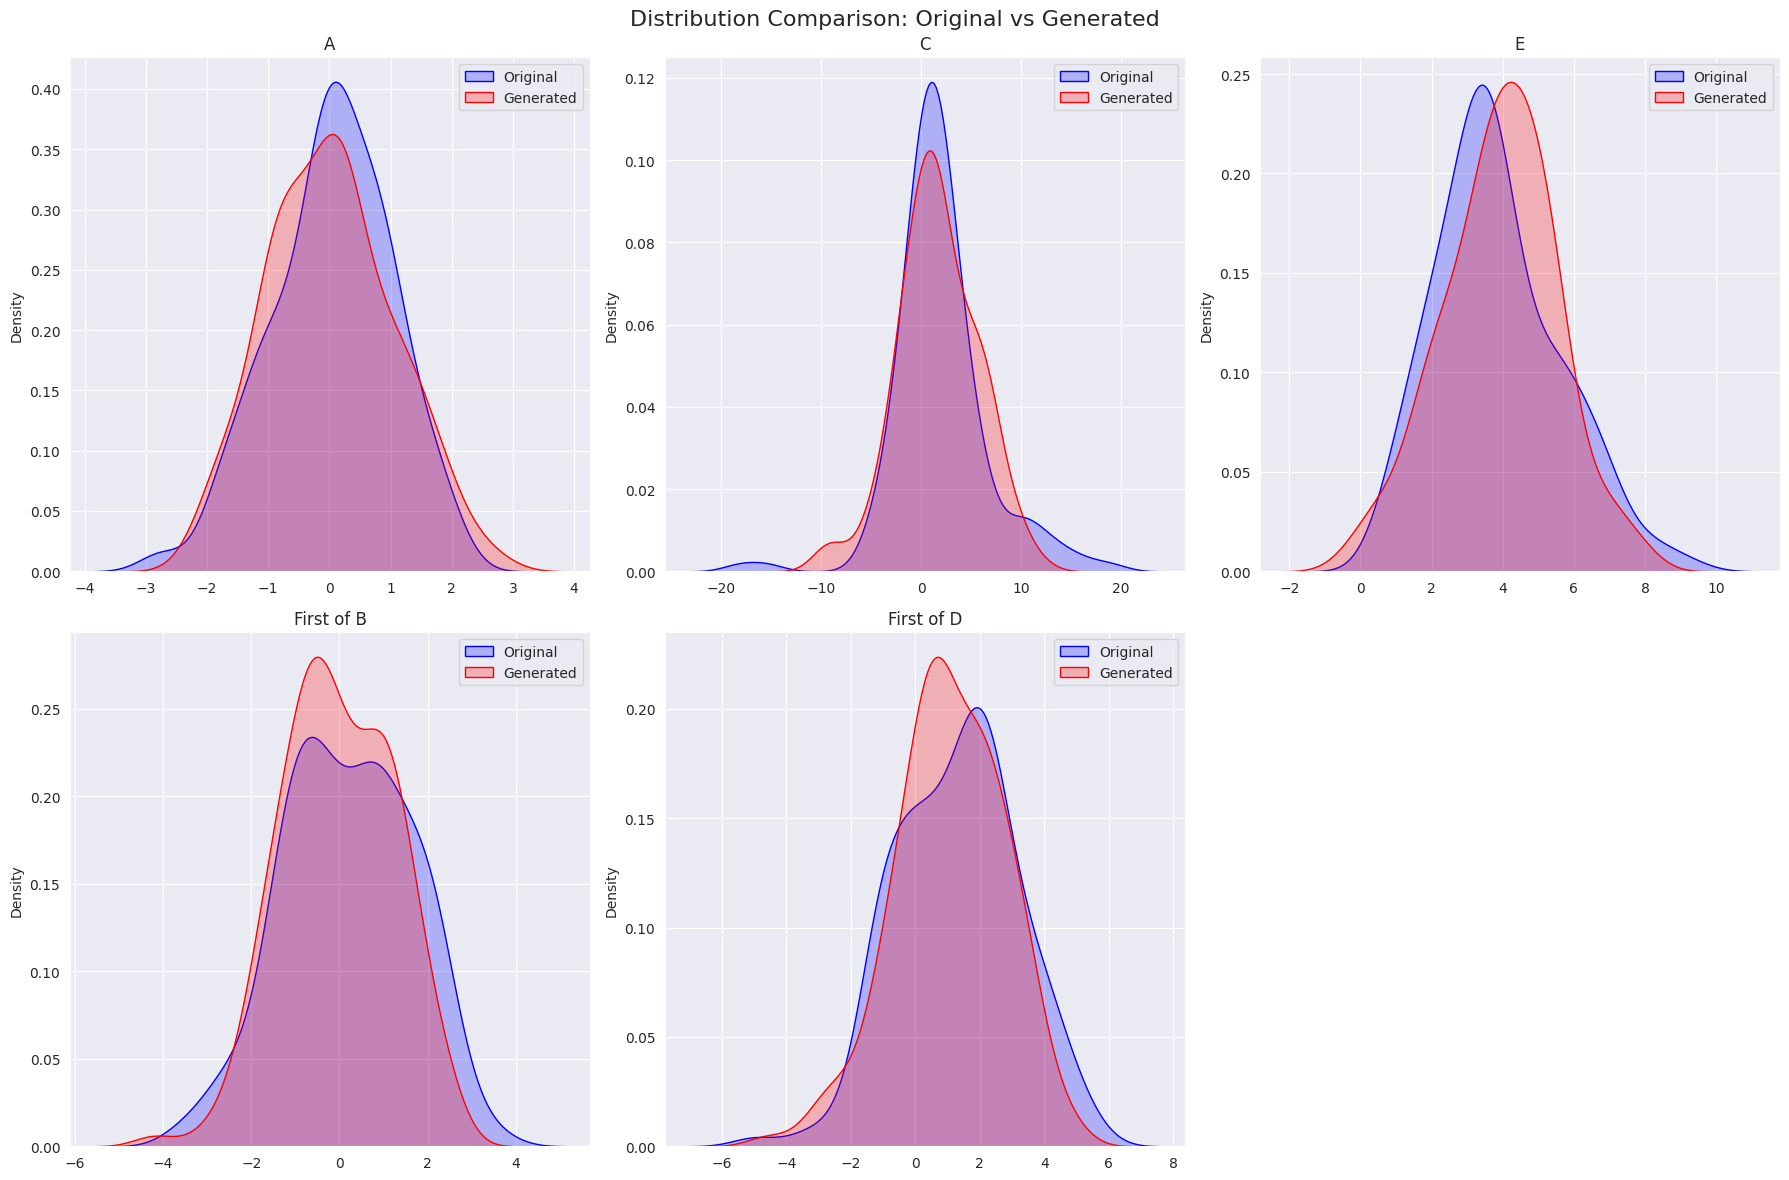

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for A, C, E, first of B, and first of D
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution Comparison: Original vs Generated', fontsize=16)

variables = ['a', 'c', 'e', 'b', 'd']
titles = ['A', 'C', 'E', 'First of B', 'First of D']

for i, (var, title) in enumerate(zip(variables, titles)):
    ax = axs[i // 3, i % 3]
    
    # Original data
    if var in ['b', 'd']:
        original = eval(var)[:, 0]  # Take first column for B and D
        generated = generated_data[var][:, 0]
    else:
        original = eval(var)
        generated = generated_data[var]
    
    sns.kdeplot(original, ax=ax, color='blue', label='Original', shade=True)
    sns.kdeplot(generated, ax=ax, color='red', label='Generated', shade=True)
    
    ax.set_title(title)
    ax.legend()

# Remove the empty subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [143]:

# %%
import json
import os


# Function to save sampled data to a JSON file
def save_sampled_data(data, filename):
    # Delete existing file if it exists
    if os.path.exists(filename):
        os.remove(filename)

    # Write new data to file
    print(f"Saving data to {filename}")
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    print("Data saved successfully")


# %%
def experiment(a,n):
    all_data = []
    all_kl_divs = []
    for k in range(a,n):
        data = load_data_from_json(f'data/sampled_data_{k}.json')

        a = np.array([data[f'a{i}'] for i in range(n_schools)])
        c = np.array([data[f'c{i}'] for i in range(n_schools)])
        e = np.array([data[f'e{i}'] for i in range(n_schools)])

        # For b and d, we need to create 2D arrays
        b = np.array([[data[f'_b{i}_{j}'] for j in range(n_students)] for i in range(n_schools)])
        d = np.array([[data[f'_d{i}_{j}'] for j in range(n_students)] for i in range(n_schools)])

        with pm.Model() as model:
    # Priors pour les coefficients (au niveau des écoles)
            mu_A = pm.Normal('mu_A', mu=0, sigma=1)
            sigma_A = pm.HalfNormal('sigma_A', sigma=1)
            A_j = pm.Normal('A_j', mu=mu_A, sigma=sigma_A, observed=a)

            mu_C = pm.Normal('mu_C', mu=0, sigma=1)
            sigma_C = pm.HalfNormal('sigma_C', sigma=1)
            C_j = pm.Normal('C_j', mu=mu_C, sigma=sigma_C, observed=c)

            mu_E = pm.Normal('mu_E', mu=0, sigma=1)
            sigma_E = pm.HalfNormal('sigma_E', sigma=1)
            E_j = pm.Normal('E_j', mu=mu_E, sigma=sigma_E, observed=e)



            # Variables aléatoires pour les écoles
            alpha_B = pm.Normal('alpha_B', mu=0, sigma=1)
            beta_B_A = pm.Normal('beta_B_A', mu=0, sigma=1)
            beta_B_C = pm.Normal('beta_B_C', mu=0, sigma=1)
            beta_B_E = pm.Normal('beta_B_E', mu=0, sigma=1)

            alpha_D = pm.Normal('alpha_D', mu=1, sigma=1)
            beta_D_A = pm.Normal('beta_D_A', mu=1, sigma=1)
            beta_D_C = pm.Normal('beta_D_C', mu=1, sigma=1)
            beta_D_E = pm.Normal('beta_D_E', mu=1, sigma=1)
            beta_D_A3 = pm.Normal('beta_D_A3', mu=1, sigma=1)
            beta_D_A2 = pm.Normal('beta_D_A2', mu=1, sigma=1)


            # Variables aléatoires pour les écoles
            mu_B_j = alpha_B + beta_B_A * a + beta_B_C * c + beta_B_E * e
            mu_D_j = alpha_D + beta_D_A * a + beta_D_C * c + beta_D_E * e + beta_D_A3 * a**3  + beta_D_A2 * a**2

            # Ajustement des dimensions pour correspondre à celles des élèves
            mu_B_j = pm.Deterministic('mu_B_j', mu_B_j[:, None])
            mu_D_j = pm.Deterministic('mu_D_j', mu_D_j[:, None])

            # Priors pour les écarts types au niveau des élèves
            sigma_B = pm.HalfNormal('sigma_B', sigma=1)
            sigma_D = pm.HalfNormal('sigma_D', sigma=1)

            # Niveau des élèves : chaque élève est modelé en fonction de son école
            B = pm.Normal('B', mu=mu_B_j, sigma=sigma_B, observed=b)
            D = pm.Normal('D', mu=mu_D_j, sigma=sigma_D, observed=d)

            # Inference
            trace = pm.sample(1000, return_inferencedata=True, progressbar=True)

        # Analyse des résultats
        print(pm.summary(trace, var_names=['alpha_B', 'beta_B_A', 'beta_B_C', 'beta_B_E','alpha_D', 'beta_D_A', 'beta_D_C', 'beta_D_E',  'sigma_B', 'sigma_D', 'beta_D_A3', 'beta_D_A2', 'mu_A', 'sigma_A', 'mu_C', 'sigma_C', 'mu_E', 'sigma_E', 'mu_B_j', 'mu_D_j']))
        generated_data = {}

        # a
        mu_A_posterior = trace.posterior['mu_A'].mean(dim=('chain', 'draw')).values
        sigma_A_posterior = trace.posterior['sigma_A'].mean(dim=('chain', 'draw')).values
        new_a = np.random.normal(mu_A_posterior, sigma_A_posterior, size=n_schools)
        generated_data['a'] = new_a
        
        np.save(f'data/generated_a_{k}.npy', generated_data['a'])

        # c
        mu_C_posterior = trace.posterior['mu_C'].mean(dim=('chain', 'draw')).values
        sigma_C_posterior = trace.posterior['sigma_C'].mean(dim=('chain', 'draw')).values
        new_c = np.random.normal(mu_C_posterior, sigma_C_posterior, size=n_schools)
        generated_data['c'] = new_c
        
        np.save(f'data/generated_c_{k}.npy', generated_data['c'])

        # e
        mu_E_posterior = trace.posterior['mu_E'].mean(dim=('chain', 'draw')).values
        sigma_E_posterior = trace.posterior['sigma_E'].mean(dim=('chain', 'draw')).values
        new_e = np.random.normal(mu_E_posterior, sigma_E_posterior, size=n_schools)
        generated_data['e'] = new_e
        
        np.save(f'data/generated_e_{k}.npy', generated_data['a'])

        # b
        mu_B = trace.posterior['mu_B_j'].mean(dim=('chain', 'draw')).values
        sigma_B = trace.posterior['sigma_B'].mean(dim=('chain', 'draw')).values
        generated_data['b'] = np.random.normal(mu_B, sigma_B, size=(n_schools, n_students))
        
        np.save(f'data/generated_b_{k}.npy', generated_data['b'])

        mu_D = trace.posterior['mu_D_j'].mean(dim=('chain', 'draw')).values
        sigma_D = trace.posterior['sigma_D'].mean(dim=('chain', 'draw')).values
        generated_data['d'] = np.random.normal(mu_D, sigma_D, size=(n_schools, n_students)) # ok à faire

        np.save(f'data/generated_d_{k}.npy', generated_data['d'])



        kl_divs = {}

        for var in ['a', 'c', 'e']:
            original = eval(var)  # Les données originales
            generated = generated_data[var]  # Les données générées

            # Pour b et d, nous devons aplatir les arrays 2D
            if var in ['b', 'd']:
                original = original.flatten()
                generated = generated.flatten()  # be careful with is, it's all kl divs ..., not a kl div in 2d or a kl div for each

            kl_divs[var] = kl_divergence(original, generated)
        all_data.append((data, generated_data))

        all_kl_divs.append(kl_divs)

    return all_kl_divs, all_data



In [201]:

# %%
kl_divs, all_data = experiment(0,50)
# %%


Data successfully loaded from data/sampled_data_0.json


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 58 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.033  0.019  -0.070    0.002      0.000      0.0    3520.0   
beta_B_A        0.992  0.012   0.969    1.015      0.000      0.0    4065.0   
beta_B_C        0.001  0.002  -0.003    0.005      0.000      0.0    3852.0   
beta_B_E        0.005  0.006  -0.006    0.015      0.000      0.0    3659.0   
alpha_D         0.961  0.030   0.903    1.016      0.001      0.0    2697.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.273  0.017   1.240    1.305      0.000      0.0    2605.0   
mu_D_j[146, 0]  1.138  0.016   1.108    1.168      0.000      0.0    3118.0   
mu_D_j[147, 0]  2.368  0.023   2.324    2.410      0.000      0.0    4178.0   
mu_D_j[148, 0]  1.668  0.017   1.638    1.701      0.000      0.0    4557.0   
mu_D_j[149, 0]  0.118  0.019   0.081    0.151      0.000      0.0    3862.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.002  0.020  -0.040    0.034        0.0      0.0    3774.0   
beta_B_A        0.991  0.013   0.968    1.017        0.0      0.0    4687.0   
beta_B_C        0.000  0.002  -0.004    0.005        0.0      0.0    5266.0   
beta_B_E       -0.001  0.006  -0.012    0.009        0.0      0.0    3911.0   
alpha_D         0.963  0.031   0.907    1.022        0.0      0.0    3825.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.831  0.015   0.803    0.860        0.0      0.0    4441.0   
mu_D_j[146, 0]  1.239  0.016   1.209    1.271        0.0      0.0    3413.0   
mu_D_j[147, 0]  1.195  0.027   1.144    1.245        0.0      0.0    3145.0   
mu_D_j[148, 0]  0.341  0.018   0.308    0.376        0.0      0.0    3914.0   
mu_D_j[149, 0]  0.815  0.022   0.774    0.857        0.0      0.0    3355.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.001  0.019  -0.033    0.038      0.000      0.0    3319.0   
beta_B_A        1.015  0.016   0.983    1.044      0.000      0.0    2905.0   
beta_B_C       -0.002  0.003  -0.008    0.004      0.000      0.0    3245.0   
beta_B_E        0.002  0.005  -0.007    0.012      0.000      0.0    3336.0   
alpha_D         0.982  0.030   0.926    1.037      0.001      0.0    2807.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  2.805  0.031   2.747    2.862      0.000      0.0    4325.0   
mu_D_j[146, 0]  0.704  0.025   0.660    0.752      0.000      0.0    3797.0   
mu_D_j[147, 0]  1.236  0.023   1.193    1.278      0.000      0.0    2690.0   
mu_D_j[148, 0]  0.512  0.015   0.482    0.539      0.000      0.0    4209.0   
mu_D_j[149, 0]  1.604  0.020   1.568    1.640      0.000      0.0    3881.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.040  0.019  -0.076   -0.003      0.000      0.0    2812.0   
beta_B_A        0.969  0.017   0.938    1.001      0.000      0.0    3289.0   
beta_B_C        0.004  0.003  -0.002    0.009      0.000      0.0    3957.0   
beta_B_E        0.006  0.006  -0.004    0.017      0.000      0.0    3084.0   
alpha_D         0.898  0.031   0.843    0.960      0.001      0.0    2472.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.971  0.016   0.944    1.002      0.000      0.0    3635.0   
mu_D_j[146, 0]  1.009  0.012   0.987    1.032      0.000      0.0    5459.0   
mu_D_j[147, 0]  0.445  0.018   0.410    0.478      0.000      0.0    4158.0   
mu_D_j[148, 0]  1.574  0.017   1.543    1.605      0.000      0.0    4172.0   
mu_D_j[149, 0]  2.334  0.023   2.293    2.380      0.000      0.0    4121.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.019  0.020  -0.056    0.019      0.000    0.000    3304.0   
beta_B_A        0.991  0.015   0.963    1.019      0.000    0.000    3204.0   
beta_B_C        0.003  0.003  -0.002    0.008      0.000    0.000    3641.0   
beta_B_E        0.004  0.006  -0.006    0.015      0.000    0.000    3350.0   
alpha_D         0.984  0.030   0.924    1.038      0.001    0.000    3059.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.080  0.026   0.033    0.128      0.000    0.000    3567.0   
mu_D_j[146, 0]  2.389  0.022   2.348    2.432      0.000    0.000    3964.0   
mu_D_j[147, 0]  2.277  0.022   2.238    2.322      0.000    0.000    4288.0   
mu_D_j[148, 0]  1.803  0.025   1.759    1.851      0.000    0.000    3119.0   
mu_D_j[149, 0] -1.726  0.084  -1.875   -1.561      0.001    0.001    5387.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.049  0.021  -0.087   -0.011      0.000      0.0    3544.0   
beta_B_A        0.986  0.014   0.960    1.011      0.000      0.0    3520.0   
beta_B_C       -0.000  0.002  -0.005    0.004      0.000      0.0    3885.0   
beta_B_E        0.011  0.005   0.001    0.021      0.000      0.0    3446.0   
alpha_D         0.906  0.033   0.844    0.969      0.001      0.0    3447.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.183  0.017   1.151    1.217      0.000      0.0    3293.0   
mu_D_j[146, 0] -0.080  0.021  -0.117   -0.037      0.000      0.0    3426.0   
mu_D_j[147, 0]  0.432  0.027   0.382    0.484      0.000      0.0    4342.0   
mu_D_j[148, 0]  2.066  0.018   2.031    2.099      0.000      0.0    4717.0   
mu_D_j[149, 0]  1.180  0.018   1.146    1.214      0.000      0.0    3857.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.037  0.018  -0.070   -0.003      0.000      0.0    2988.0   
beta_B_A        0.972  0.013   0.947    0.998      0.000      0.0    3198.0   
beta_B_C        0.003  0.002  -0.001    0.006      0.000      0.0    4389.0   
beta_B_E        0.005  0.005  -0.003    0.014      0.000      0.0    3168.0   
alpha_D         0.947  0.031   0.891    1.007      0.001      0.0    2858.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.126  0.016   0.095    0.154      0.000      0.0    4076.0   
mu_D_j[146, 0]  1.392  0.019   1.358    1.430      0.000      0.0    3239.0   
mu_D_j[147, 0] -0.203  0.026  -0.254   -0.157      0.000      0.0    3717.0   
mu_D_j[148, 0]  2.403  0.022   2.365    2.447      0.000      0.0    3891.0   
mu_D_j[149, 0]  0.207  0.020   0.170    0.243      0.000      0.0    3340.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.020  0.024  -0.063    0.027      0.000      0.0    2552.0   
beta_B_A        0.987  0.017   0.954    1.018      0.000      0.0    2715.0   
beta_B_C        0.004  0.005  -0.006    0.013      0.000      0.0    3022.0   
beta_B_E        0.006  0.007  -0.007    0.020      0.000      0.0    2616.0   
alpha_D         0.948  0.033   0.886    1.011      0.001      0.0    2562.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.340  0.016   0.310    0.370      0.000      0.0    4182.0   
mu_D_j[146, 0]  1.524  0.019   1.489    1.559      0.000      0.0    3087.0   
mu_D_j[147, 0]  1.966  0.020   1.930    2.003      0.000      0.0    3672.0   
mu_D_j[148, 0]  1.171  0.015   1.142    1.198      0.000      0.0    3698.0   
mu_D_j[149, 0]  1.689  0.020   1.651    1.727      0.000      0.0    3274.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.015  0.021  -0.056    0.023      0.000      0.0    3360.0   
beta_B_A        0.997  0.012   0.975    1.021      0.000      0.0    3514.0   
beta_B_C       -0.000  0.002  -0.004    0.004      0.000      0.0    3908.0   
beta_B_E        0.004  0.006  -0.007    0.015      0.000      0.0    3324.0   
alpha_D         0.947  0.032   0.886    1.006      0.001      0.0    3088.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.302  0.016   1.274    1.333      0.000      0.0    3785.0   
mu_D_j[146, 0] -0.187  0.028  -0.239   -0.133      0.001      0.0    2721.0   
mu_D_j[147, 0]  0.116  0.023   0.072    0.158      0.000      0.0    3851.0   
mu_D_j[148, 0]  0.297  0.022   0.258    0.339      0.000      0.0    3536.0   
mu_D_j[149, 0]  1.027  0.021   0.986    1.067      0.000      0.0    2932.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 78 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.022  0.020  -0.060    0.014      0.000    0.000    2392.0   
beta_B_A        1.005  0.011   0.984    1.026      0.000    0.000    3367.0   
beta_B_C       -0.001  0.001  -0.003    0.002      0.000    0.000    3715.0   
beta_B_E        0.006  0.006  -0.004    0.017      0.000    0.000    2276.0   
alpha_D         0.928  0.032   0.868    0.989      0.001    0.001    2052.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.089  0.016   1.061    1.119      0.000    0.000    2114.0   
mu_D_j[146, 0]  1.902  0.020   1.865    1.939      0.000    0.000    3790.0   
mu_D_j[147, 0]  2.454  0.024   2.408    2.496      0.000    0.000    2686.0   
mu_D_j[148, 0]  1.676  0.021   1.636    1.713      0.000    0.000    1897.0   
mu_D_j[149, 0]  1.259  0.013   1.234    1.283      0.000    0.000    4028.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B         0.008  0.020  -0.029    0.047      0.000      0.0    3501.0   
beta_B_A        1.003  0.016   0.972    1.031      0.000      0.0    3737.0   
beta_B_C        0.003  0.003  -0.002    0.008      0.000      0.0    4432.0   
beta_B_E       -0.003  0.005  -0.012    0.007      0.000      0.0    3494.0   
alpha_D         0.994  0.032   0.935    1.055      0.001      0.0    3243.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.484  0.015   1.455    1.513      0.000      0.0    4293.0   
mu_D_j[146, 0]  1.926  0.018   1.893    1.961      0.000      0.0    3709.0   
mu_D_j[147, 0]  0.940  0.015   0.911    0.969      0.000      0.0    3415.0   
mu_D_j[148, 0]  1.675  0.020   1.635    1.711      0.000      0.0    4309.0   
mu_D_j[149, 0]  1.029  0.017   0.997    1.060      0.000      0.0    3623.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.004  0.019  -0.039    0.031      0.000      0.0    4064.0   
beta_B_A        0.985  0.013   0.962    1.011      0.000      0.0    4510.0   
beta_B_C        0.003  0.002  -0.002    0.007      0.000      0.0    4429.0   
beta_B_E       -0.001  0.005  -0.011    0.009      0.000      0.0    3910.0   
alpha_D         0.975  0.030   0.916    1.028      0.001      0.0    3307.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.664  0.014   0.638    0.690      0.000      0.0    4358.0   
mu_D_j[146, 0]  0.632  0.028   0.576    0.680      0.001      0.0    2896.0   
mu_D_j[147, 0] -0.268  0.022  -0.310   -0.226      0.000      0.0    4271.0   
mu_D_j[148, 0] -0.047  0.018  -0.080   -0.011      0.000      0.0    4876.0   
mu_D_j[149, 0] -0.994  0.030  -1.050   -0.940      0.000      0.0    4269.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 61 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.021  0.020  -0.059    0.017      0.000      0.0    2910.0   
beta_B_A        0.990  0.013   0.965    1.014      0.000      0.0    3995.0   
beta_B_C       -0.001  0.002  -0.004    0.003      0.000      0.0    5099.0   
beta_B_E        0.009  0.005  -0.001    0.019      0.000      0.0    2959.0   
alpha_D         0.912  0.031   0.854    0.972      0.001      0.0    2982.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  2.002  0.015   1.974    2.032      0.000      0.0    3862.0   
mu_D_j[146, 0]  0.275  0.015   0.248    0.305      0.000      0.0    4715.0   
mu_D_j[147, 0]  1.193  0.013   1.169    1.216      0.000      0.0    4156.0   
mu_D_j[148, 0]  3.107  0.030   3.048    3.160      0.000      0.0    3861.0   
mu_D_j[149, 0]  2.351  0.021   2.310    2.389      0.000      0.0    3544.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.041  0.023  -0.084    0.002      0.000    0.000    3087.0   
beta_B_A        0.970  0.018   0.935    1.004      0.000    0.000    2799.0   
beta_B_C        0.001  0.003  -0.005    0.008      0.000    0.000    3638.0   
beta_B_E        0.013  0.006   0.001    0.023      0.000    0.000    3410.0   
alpha_D         0.909  0.034   0.846    0.973      0.001    0.000    3067.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  2.002  0.016   1.975    2.033      0.000    0.000    4336.0   
mu_D_j[146, 0]  3.098  0.062   2.982    3.213      0.001    0.001    5456.0   
mu_D_j[147, 0] -0.319  0.025  -0.366   -0.274      0.000    0.000    4256.0   
mu_D_j[148, 0]  0.251  0.016   0.222    0.282      0.000    0.000    5476.0   
mu_D_j[149, 0]  0.778  0.016   0.747    0.807      0.000    0.000    4296.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.039  0.020  -0.075   -0.002      0.000      0.0    3825.0   
beta_B_A        0.974  0.014   0.948    1.001      0.000      0.0    4471.0   
beta_B_C        0.002  0.002  -0.003    0.006      0.000      0.0    4730.0   
beta_B_E        0.014  0.005   0.004    0.023      0.000      0.0    3889.0   
alpha_D         0.903  0.030   0.847    0.960      0.001      0.0    3398.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.287  0.019   0.251    0.323      0.000      0.0    3982.0   
mu_D_j[146, 0]  1.897  0.017   1.866    1.929      0.000      0.0    4047.0   
mu_D_j[147, 0]  0.952  0.012   0.929    0.975      0.000      0.0    4490.0   
mu_D_j[148, 0]  0.428  0.021   0.389    0.467      0.000      0.0    4068.0   
mu_D_j[149, 0]  0.782  0.013   0.756    0.806      0.000      0.0    4296.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.038  0.021  -0.078    0.002      0.000      0.0    2972.0   
beta_B_A        0.975  0.016   0.946    1.005      0.000      0.0    3373.0   
beta_B_C        0.001  0.004  -0.006    0.008      0.000      0.0    3488.0   
beta_B_E        0.010  0.006  -0.001    0.022      0.000      0.0    2981.0   
alpha_D         0.948  0.032   0.887    1.006      0.001      0.0    2673.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  2.493  0.026   2.445    2.543      0.000      0.0    4049.0   
mu_D_j[146, 0]  0.563  0.015   0.534    0.591      0.000      0.0    5526.0   
mu_D_j[147, 0]  1.512  0.014   1.485    1.539      0.000      0.0    4480.0   
mu_D_j[148, 0]  1.946  0.016   1.915    1.976      0.000      0.0    3992.0   
mu_D_j[149, 0]  2.243  0.031   2.184    2.297      0.001      0.0    3125.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B         0.023  0.021  -0.016    0.062      0.000      0.0    2026.0   
beta_B_A        0.987  0.017   0.953    1.017      0.000      0.0    2114.0   
beta_B_C        0.004  0.004  -0.003    0.012      0.000      0.0    2471.0   
beta_B_E       -0.005  0.006  -0.016    0.006      0.000      0.0    2415.0   
alpha_D         0.997  0.032   0.937    1.057      0.001      0.0    2178.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0] -0.118  0.022  -0.161   -0.077      0.000      0.0    2724.0   
mu_D_j[146, 0]  0.569  0.027   0.521    0.623      0.001      0.0    2640.0   
mu_D_j[147, 0]  1.114  0.013   1.088    1.139      0.000      0.0    3678.0   
mu_D_j[148, 0]  2.011  0.019   1.975    2.045      0.000      0.0    4426.0   
mu_D_j[149, 0] -0.530  0.026  -0.579   -0.483      0.000      0.0    3964.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.037  0.018  -0.071   -0.005        0.0      0.0    3490.0   
beta_B_A        0.984  0.015   0.957    1.011        0.0      0.0    3921.0   
beta_B_C        0.001  0.003  -0.004    0.006        0.0      0.0    3867.0   
beta_B_E        0.011  0.005   0.002    0.020        0.0      0.0    3614.0   
alpha_D         0.928  0.028   0.874    0.980        0.0      0.0    3896.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  2.733  0.027   2.679    2.779        0.0      0.0    4223.0   
mu_D_j[146, 0] -0.678  0.027  -0.727   -0.629        0.0      0.0    3843.0   
mu_D_j[147, 0]  0.998  0.017   0.965    1.031        0.0      0.0    3706.0   
mu_D_j[148, 0]  0.957  0.013   0.931    0.980        0.0      0.0    4563.0   
mu_D_j[149, 0]  1.367  0.021   1.326    1.404        0.0      0.0    4309.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B         0.006  0.020  -0.029    0.044        0.0      0.0    3164.0   
beta_B_A        1.005  0.013   0.979    1.030        0.0      0.0    4508.0   
beta_B_C       -0.001  0.002  -0.005    0.003        0.0      0.0    4728.0   
beta_B_E        0.002  0.006  -0.009    0.012        0.0      0.0    3167.0   
alpha_D         0.992  0.029   0.937    1.048        0.0      0.0    3550.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.802  0.016   1.772    1.834        0.0      0.0    3076.0   
mu_D_j[146, 0]  0.809  0.016   0.779    0.840        0.0      0.0    4275.0   
mu_D_j[147, 0] -0.069  0.019  -0.105   -0.036        0.0      0.0    4146.0   
mu_D_j[148, 0]  0.899  0.016   0.868    0.929        0.0      0.0    4535.0   
mu_D_j[149, 0]  1.045  0.022   1.004    1.085        0.0      0.0    3963.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.033  0.020  -0.073    0.002      0.000      0.0    3554.0   
beta_B_A        0.985  0.013   0.959    1.009      0.000      0.0    3812.0   
beta_B_C        0.001  0.003  -0.004    0.005      0.000      0.0    3647.0   
beta_B_E        0.008  0.006  -0.003    0.018      0.000      0.0    3282.0   
alpha_D         0.929  0.030   0.874    0.986      0.001      0.0    3180.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.284  0.019   0.249    0.320      0.000      0.0    3799.0   
mu_D_j[146, 0] -0.121  0.024  -0.166   -0.078      0.000      0.0    4067.0   
mu_D_j[147, 0]  0.777  0.014   0.750    0.802      0.000      0.0    3936.0   
mu_D_j[148, 0] -0.125  0.024  -0.173   -0.082      0.000      0.0    4594.0   
mu_D_j[149, 0]  0.733  0.017   0.699    0.764      0.000      0.0    4378.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 63 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B         0.011  0.023  -0.032    0.052      0.000      0.0    3234.0   
beta_B_A        1.018  0.014   0.992    1.045      0.000      0.0    3608.0   
beta_B_C       -0.001  0.002  -0.005    0.003      0.000      0.0    4141.0   
beta_B_E       -0.004  0.007  -0.017    0.007      0.000      0.0    3233.0   
alpha_D         0.966  0.033   0.906    1.029      0.001      0.0    3548.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.052  0.018   0.018    0.085      0.000      0.0    4519.0   
mu_D_j[146, 0]  2.723  0.020   2.687    2.763      0.000      0.0    4086.0   
mu_D_j[147, 0]  2.234  0.029   2.182    2.290      0.000      0.0    3597.0   
mu_D_j[148, 0]  1.364  0.012   1.341    1.386      0.000      0.0    4442.0   
mu_D_j[149, 0]  1.444  0.013   1.419    1.468      0.000      0.0    4220.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 71 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.001  0.019  -0.036    0.035      0.000      0.0    2811.0   
beta_B_A        1.004  0.012   0.981    1.027      0.000      0.0    3544.0   
beta_B_C       -0.001  0.002  -0.004    0.002      0.000      0.0    4370.0   
beta_B_E        0.003  0.005  -0.007    0.013      0.000      0.0    2790.0   
alpha_D         0.962  0.031   0.902    1.019      0.001      0.0    2560.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0] -0.352  0.018  -0.387   -0.319      0.000      0.0    4524.0   
mu_D_j[146, 0] -0.482  0.025  -0.527   -0.433      0.000      0.0    3015.0   
mu_D_j[147, 0]  1.814  0.016   1.783    1.842      0.000      0.0    3579.0   
mu_D_j[148, 0]  2.102  0.018   2.069    2.137      0.000      0.0    3816.0   
mu_D_j[149, 0]  1.211  0.020   1.171    1.246      0.000      0.0    2166.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.050  0.019  -0.086   -0.014      0.000      0.0    3982.0   
beta_B_A        0.993  0.015   0.965    1.021      0.000      0.0    4003.0   
beta_B_C       -0.004  0.003  -0.009    0.001      0.000      0.0    4592.0   
beta_B_E        0.017  0.006   0.006    0.027      0.000      0.0    4213.0   
alpha_D         0.953  0.029   0.897    1.004      0.000      0.0    3663.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.710  0.015   0.679    0.737      0.000      0.0    4592.0   
mu_D_j[146, 0]  0.900  0.015   0.871    0.926      0.000      0.0    4212.0   
mu_D_j[147, 0]  0.924  0.023   0.883    0.970      0.000      0.0    3436.0   
mu_D_j[148, 0]  0.558  0.015   0.530    0.584      0.000      0.0    4424.0   
mu_D_j[149, 0] -0.387  0.035  -0.453   -0.322      0.001      0.0    4043.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 63 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.034  0.019  -0.071    0.000      0.000    0.000    3013.0   
beta_B_A        0.971  0.013   0.948    0.996      0.000    0.000    3424.0   
beta_B_C        0.002  0.002  -0.001    0.006      0.000    0.000    4541.0   
beta_B_E        0.006  0.005  -0.003    0.015      0.000    0.000    3213.0   
alpha_D         0.942  0.029   0.887    0.997      0.001    0.000    2889.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.359  0.020   1.320    1.396      0.000    0.000    4112.0   
mu_D_j[146, 0]  1.298  0.014   1.270    1.323      0.000    0.000    3060.0   
mu_D_j[147, 0] -0.360  0.027  -0.410   -0.309      0.000    0.000    4624.0   
mu_D_j[148, 0] -1.700  0.046  -1.786   -1.615      0.001    0.001    3639.0   
mu_D_j[149, 0]  0.886  0.012   0.862    0.908      0.000    0.000    3519.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.028  0.022  -0.069    0.012      0.000      0.0    2454.0   
beta_B_A        0.984  0.016   0.954    1.013      0.000      0.0    2259.0   
beta_B_C        0.001  0.003  -0.004    0.007      0.000      0.0    2819.0   
beta_B_E        0.009  0.006  -0.002    0.020      0.000      0.0    2660.0   
alpha_D         0.953  0.031   0.895    1.014      0.001      0.0    2576.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.232  0.020   1.196    1.272      0.000      0.0    3539.0   
mu_D_j[146, 0]  1.971  0.018   1.939    2.005      0.000      0.0    3852.0   
mu_D_j[147, 0]  1.623  0.022   1.583    1.666      0.000      0.0    2796.0   
mu_D_j[148, 0]  1.378  0.022   1.339    1.421      0.000      0.0    2587.0   
mu_D_j[149, 0]  0.658  0.016   0.629    0.687      0.000      0.0    4285.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.043  0.019  -0.077   -0.008      0.000      0.0    3180.0   
beta_B_A        0.981  0.015   0.952    1.008      0.000      0.0    3521.0   
beta_B_C       -0.000  0.003  -0.005    0.005      0.000      0.0    3652.0   
beta_B_E        0.010  0.005  -0.000    0.019      0.000      0.0    3120.0   
alpha_D         0.881  0.030   0.824    0.937      0.001      0.0    2805.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.024  0.016  -0.005    0.055      0.000      0.0    5594.0   
mu_D_j[146, 0]  1.318  0.013   1.295    1.342      0.000      0.0    4512.0   
mu_D_j[147, 0]  2.547  0.023   2.505    2.590      0.000      0.0    4233.0   
mu_D_j[148, 0]  1.873  0.018   1.839    1.904      0.000      0.0    4038.0   
mu_D_j[149, 0]  1.140  0.016   1.110    1.170      0.000      0.0    4688.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.040  0.019  -0.074   -0.004      0.000      0.0    3664.0   
beta_B_A        0.972  0.016   0.943    1.000      0.000      0.0    4003.0   
beta_B_C        0.002  0.003  -0.003    0.006      0.000      0.0    4950.0   
beta_B_E        0.009  0.005   0.001    0.019      0.000      0.0    3950.0   
alpha_D         0.911  0.030   0.855    0.966      0.001      0.0    3009.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  2.222  0.019   2.185    2.256      0.000      0.0    3796.0   
mu_D_j[146, 0]  0.726  0.015   0.699    0.756      0.000      0.0    4330.0   
mu_D_j[147, 0]  0.273  0.016   0.242    0.303      0.000      0.0    4280.0   
mu_D_j[148, 0]  1.179  0.012   1.156    1.202      0.000      0.0    4500.0   
mu_D_j[149, 0]  0.080  0.023   0.036    0.123      0.000      0.0    4143.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.032  0.020  -0.069    0.006      0.000    0.000    4160.0   
beta_B_A        0.983  0.012   0.959    1.005      0.000    0.000    4923.0   
beta_B_C        0.002  0.002  -0.001    0.005      0.000    0.000    5051.0   
beta_B_E        0.008  0.006  -0.002    0.019      0.000    0.000    4095.0   
alpha_D         0.912  0.031   0.855    0.968      0.001    0.000    3525.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.773  0.024   0.727    0.816      0.000    0.000    3175.0   
mu_D_j[146, 0]  1.241  0.022   1.197    1.280      0.000    0.000    3675.0   
mu_D_j[147, 0] -1.553  0.069  -1.684   -1.431      0.001    0.001    4930.0   
mu_D_j[148, 0]  0.910  0.012   0.888    0.932      0.000    0.000    5006.0   
mu_D_j[149, 0]  1.794  0.022   1.754    1.836      0.000    0.000    3305.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.003  0.020  -0.041    0.034      0.000      0.0    3112.0   
beta_B_A        0.986  0.016   0.956    1.015      0.000      0.0    3546.0   
beta_B_C        0.002  0.003  -0.004    0.008      0.000      0.0    4028.0   
beta_B_E        0.002  0.005  -0.008    0.012      0.000      0.0    3251.0   
alpha_D         0.966  0.032   0.907    1.027      0.001      0.0    2773.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.374  0.015   0.346    0.403      0.000      0.0    5449.0   
mu_D_j[146, 0]  1.862  0.021   1.819    1.899      0.000      0.0    4429.0   
mu_D_j[147, 0]  0.402  0.015   0.373    0.429      0.000      0.0    4463.0   
mu_D_j[148, 0]  0.891  0.023   0.850    0.934      0.000      0.0    3337.0   
mu_D_j[149, 0]  0.395  0.025   0.348    0.441      0.000      0.0    2823.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.027  0.021  -0.067    0.011      0.000      0.0    3211.0   
beta_B_A        0.977  0.018   0.944    1.012      0.000      0.0    3229.0   
beta_B_C        0.002  0.004  -0.007    0.010      0.000      0.0    3455.0   
beta_B_E        0.007  0.006  -0.004    0.018      0.000      0.0    3388.0   
alpha_D         0.942  0.030   0.888    1.000      0.001      0.0    3098.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0] -0.026  0.020  -0.062    0.012      0.000      0.0    4588.0   
mu_D_j[146, 0]  0.553  0.024   0.509    0.599      0.000      0.0    3537.0   
mu_D_j[147, 0]  1.572  0.026   1.523    1.621      0.000      0.0    2979.0   
mu_D_j[148, 0]  1.227  0.014   1.201    1.256      0.000      0.0    4225.0   
mu_D_j[149, 0]  1.104  0.021   1.064    1.143      0.000      0.0    2856.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 78 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B         0.004  0.018  -0.030    0.035      0.000      0.0    2643.0   
beta_B_A        0.999  0.011   0.977    1.020      0.000      0.0    3371.0   
beta_B_C        0.002  0.001  -0.000    0.005      0.000      0.0    3639.0   
beta_B_E       -0.002  0.005  -0.011    0.007      0.000      0.0    2699.0   
alpha_D         0.961  0.029   0.906    1.012      0.001      0.0    2238.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.828  0.020   0.791    0.865      0.000      0.0    2117.0   
mu_D_j[146, 0] -0.404  0.018  -0.436   -0.370      0.000      0.0    4361.0   
mu_D_j[147, 0]  0.381  0.023   0.339    0.423      0.000      0.0    2561.0   
mu_D_j[148, 0]  1.481  0.015   1.452    1.509      0.000      0.0    3924.0   
mu_D_j[149, 0]  1.744  0.016   1.712    1.773      0.000      0.0    4047.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.009  0.021  -0.045    0.030      0.000      0.0    3064.0   
beta_B_A        0.977  0.016   0.949    1.007      0.000      0.0    3183.0   
beta_B_C        0.002  0.003  -0.004    0.009      0.000      0.0    3291.0   
beta_B_E        0.003  0.006  -0.008    0.014      0.000      0.0    3166.0   
alpha_D         0.990  0.030   0.935    1.048      0.001      0.0    2830.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.368  0.016   0.338    0.397      0.000      0.0    5063.0   
mu_D_j[146, 0]  2.585  0.023   2.542    2.628      0.000      0.0    4395.0   
mu_D_j[147, 0]  2.296  0.020   2.263    2.337      0.000      0.0    4148.0   
mu_D_j[148, 0]  1.616  0.015   1.588    1.645      0.000      0.0    4323.0   
mu_D_j[149, 0]  0.889  0.018   0.857    0.923      0.000      0.0    3380.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.038  0.019  -0.070   -0.001      0.000      0.0    3442.0   
beta_B_A        0.980  0.015   0.953    1.010      0.000      0.0    3679.0   
beta_B_C       -0.001  0.003  -0.006    0.005      0.000      0.0    3679.0   
beta_B_E        0.010  0.006  -0.001    0.020      0.000      0.0    3522.0   
alpha_D         0.924  0.030   0.868    0.979      0.001      0.0    2767.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.769  0.017   0.739    0.802      0.000      0.0    4250.0   
mu_D_j[146, 0]  1.363  0.019   1.329    1.399      0.000      0.0    3573.0   
mu_D_j[147, 0]  1.084  0.018   1.048    1.115      0.000      0.0    3207.0   
mu_D_j[148, 0] -0.201  0.033  -0.261   -0.139      0.001      0.0    3365.0   
mu_D_j[149, 0]  0.987  0.012   0.965    1.010      0.000      0.0    4556.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.033  0.021  -0.072    0.008      0.000      0.0    2864.0   
beta_B_A        0.979  0.017   0.947    1.009      0.000      0.0    2575.0   
beta_B_C        0.003  0.003  -0.003    0.008      0.000      0.0    3035.0   
beta_B_E        0.008  0.005  -0.003    0.017      0.000      0.0    3398.0   
alpha_D         0.941  0.032   0.882    1.003      0.001      0.0    2334.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.722  0.019   0.686    0.757      0.000      0.0    2272.0   
mu_D_j[146, 0]  0.357  0.017   0.325    0.387      0.000      0.0    4013.0   
mu_D_j[147, 0]  1.043  0.013   1.019    1.068      0.000      0.0    5301.0   
mu_D_j[148, 0]  1.484  0.020   1.446    1.521      0.000      0.0    2620.0   
mu_D_j[149, 0]  0.659  0.012   0.636    0.682      0.000      0.0    4621.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.003  0.017  -0.035    0.029      0.000    0.000    3049.0   
beta_B_A        0.995  0.013   0.972    1.019      0.000    0.000    3248.0   
beta_B_C        0.000  0.002  -0.004    0.004      0.000    0.000    3411.0   
beta_B_E        0.001  0.005  -0.007    0.010      0.000    0.000    3145.0   
alpha_D         0.966  0.027   0.915    1.016      0.000    0.000    3280.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0] -0.244  0.022  -0.286   -0.203      0.000    0.000    3270.0   
mu_D_j[146, 0]  0.273  0.016   0.245    0.304      0.000    0.000    4428.0   
mu_D_j[147, 0]  0.120  0.027   0.071    0.169      0.000    0.000    3345.0   
mu_D_j[148, 0]  0.237  0.022   0.197    0.277      0.000    0.000    3791.0   
mu_D_j[149, 0] -1.913  0.065  -2.036   -1.791      0.001    0.001    3940.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.021  0.020  -0.057    0.019      0.000      0.0    3922.0   
beta_B_A        1.002  0.015   0.976    1.030      0.000      0.0    3975.0   
beta_B_C       -0.004  0.003  -0.009    0.001      0.000      0.0    4778.0   
beta_B_E        0.009  0.006  -0.001    0.020      0.000      0.0    4177.0   
alpha_D         0.942  0.032   0.884    1.006      0.001      0.0    3440.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  2.247  0.018   2.216    2.283      0.000      0.0    4373.0   
mu_D_j[146, 0]  2.213  0.029   2.160    2.268      0.001      0.0    3231.0   
mu_D_j[147, 0]  1.328  0.015   1.299    1.355      0.000      0.0    4131.0   
mu_D_j[148, 0]  2.036  0.022   1.998    2.080      0.000      0.0    3618.0   
mu_D_j[149, 0]  1.221  0.017   1.190    1.251      0.000      0.0    4000.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.028  0.021  -0.068    0.010      0.000      0.0    2783.0   
beta_B_A        1.006  0.013   0.981    1.030      0.000      0.0    4220.0   
beta_B_C       -0.001  0.002  -0.005    0.003      0.000      0.0    4968.0   
beta_B_E        0.007  0.006  -0.004    0.018      0.000      0.0    2782.0   
alpha_D         0.941  0.032   0.881    1.000      0.001      0.0    3136.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.118  0.025   0.068    0.164      0.000      0.0    4251.0   
mu_D_j[146, 0]  1.610  0.014   1.584    1.637      0.000      0.0    3627.0   
mu_D_j[147, 0]  1.966  0.023   1.922    2.008      0.000      0.0    3065.0   
mu_D_j[148, 0]  0.037  0.020   0.000    0.074      0.000      0.0    4084.0   
mu_D_j[149, 0]  2.619  0.026   2.570    2.667      0.000      0.0    3465.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 65 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.011  0.019  -0.047    0.024      0.000      0.0    2671.0   
beta_B_A        0.986  0.011   0.966    1.007      0.000      0.0    3930.0   
beta_B_C        0.001  0.002  -0.002    0.004      0.000      0.0    4515.0   
beta_B_E        0.003  0.005  -0.007    0.013      0.000      0.0    2571.0   
alpha_D         0.930  0.031   0.874    0.990      0.001      0.0    2614.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.967  0.020   0.927    1.003      0.000      0.0    3661.0   
mu_D_j[146, 0]  2.483  0.024   2.440    2.530      0.000      0.0    2884.0   
mu_D_j[147, 0] -0.632  0.029  -0.686   -0.580      0.000      0.0    4222.0   
mu_D_j[148, 0]  0.791  0.021   0.752    0.830      0.000      0.0    4301.0   
mu_D_j[149, 0] -0.097  0.016  -0.128   -0.069      0.000      0.0    4843.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.040  0.018  -0.075   -0.006      0.000      0.0    3254.0   
beta_B_A        0.973  0.015   0.945    1.000      0.000      0.0    3155.0   
beta_B_C        0.003  0.003  -0.002    0.008      0.000      0.0    3648.0   
beta_B_E        0.008  0.005  -0.001    0.017      0.000      0.0    3476.0   
alpha_D         0.909  0.028   0.857    0.962      0.001      0.0    2763.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.604  0.014   1.578    1.631      0.000      0.0    4804.0   
mu_D_j[146, 0]  0.623  0.017   0.592    0.655      0.000      0.0    3335.0   
mu_D_j[147, 0]  1.101  0.022   1.062    1.145      0.000      0.0    2708.0   
mu_D_j[148, 0]  1.497  0.018   1.463    1.532      0.000      0.0    3254.0   
mu_D_j[149, 0]  1.141  0.013   1.116    1.164      0.000      0.0    4183.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.016  0.017  -0.049    0.016      0.000      0.0    3885.0   
beta_B_A        1.018  0.015   0.989    1.044      0.000      0.0    3500.0   
beta_B_C       -0.004  0.003  -0.009    0.001      0.000      0.0    3956.0   
beta_B_E        0.006  0.005  -0.002    0.015      0.000      0.0    3878.0   
alpha_D         0.925  0.028   0.870    0.978      0.001      0.0    2776.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.091  0.020   1.052    1.128      0.000      0.0    2984.0   
mu_D_j[146, 0]  0.559  0.014   0.531    0.585      0.000      0.0    4170.0   
mu_D_j[147, 0]  0.795  0.014   0.769    0.821      0.000      0.0    3958.0   
mu_D_j[148, 0]  1.867  0.023   1.826    1.911      0.000      0.0    2996.0   
mu_D_j[149, 0]  2.639  0.024   2.592    2.683      0.000      0.0    4434.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.017  0.018  -0.051    0.018      0.000    0.000    4017.0   
beta_B_A        0.986  0.015   0.960    1.014      0.000    0.000    4429.0   
beta_B_C        0.001  0.003  -0.004    0.006      0.000    0.000    4673.0   
beta_B_E        0.004  0.005  -0.005    0.014      0.000    0.000    4098.0   
alpha_D         0.949  0.030   0.891    1.005      0.001    0.000    3155.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.930  0.019   1.895    1.965      0.000    0.000    3244.0   
mu_D_j[146, 0] -1.882  0.078  -2.034   -1.741      0.001    0.001    4681.0   
mu_D_j[147, 0]  1.068  0.012   1.045    1.090      0.000    0.000    4166.0   
mu_D_j[148, 0]  1.101  0.028   1.050    1.156      0.001    0.000    2858.0   
mu_D_j[149, 0]  1.337  0.013   1.313    1.361      0.000    0.000    4133.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 72 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B         0.007  0.019  -0.026    0.046      0.000      0.0    2736.0   
beta_B_A        1.006  0.011   0.985    1.027      0.000      0.0    3871.0   
beta_B_C        0.000  0.001  -0.002    0.003      0.000      0.0    4055.0   
beta_B_E       -0.004  0.005  -0.014    0.006      0.000      0.0    2606.0   
alpha_D         1.025  0.028   0.973    1.079      0.001      0.0    2484.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.442  0.026   1.397    1.492      0.001      0.0    2269.0   
mu_D_j[146, 0]  0.314  0.015   0.288    0.342      0.000      0.0    6133.0   
mu_D_j[147, 0]  1.011  0.017   0.980    1.044      0.000      0.0    3676.0   
mu_D_j[148, 0]  1.777  0.015   1.749    1.804      0.000      0.0    4313.0   
mu_D_j[149, 0]  2.321  0.023   2.278    2.364      0.000      0.0    4525.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 63 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.016  0.020  -0.054    0.021      0.000      0.0    3927.0   
beta_B_A        0.997  0.015   0.968    1.023      0.000      0.0    4537.0   
beta_B_C        0.001  0.003  -0.004    0.007      0.000      0.0    4687.0   
beta_B_E        0.002  0.005  -0.008    0.012      0.000      0.0    3934.0   
alpha_D         0.959  0.033   0.901    1.020      0.001      0.0    3400.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.969  0.025   1.921    2.013      0.000      0.0    5038.0   
mu_D_j[146, 0] -0.128  0.017  -0.161   -0.096      0.000      0.0    5072.0   
mu_D_j[147, 0]  0.642  0.029   0.588    0.697      0.000      0.0    3452.0   
mu_D_j[148, 0]  3.273  0.041   3.198    3.352      0.001      0.0    4090.0   
mu_D_j[149, 0]  0.366  0.022   0.327    0.409      0.000      0.0    4527.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.005  0.020  -0.044    0.029      0.000      0.0    3145.0   
beta_B_A        0.997  0.013   0.971    1.021      0.000      0.0    4248.0   
beta_B_C        0.001  0.002  -0.003    0.005      0.000      0.0    5236.0   
beta_B_E        0.002  0.005  -0.008    0.012      0.000      0.0    3070.0   
alpha_D         0.979  0.030   0.921    1.034      0.001      0.0    2928.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.586  0.019   0.549    0.621      0.000      0.0    4089.0   
mu_D_j[146, 0]  1.096  0.013   1.073    1.121      0.000      0.0    4558.0   
mu_D_j[147, 0] -0.375  0.020  -0.413   -0.336      0.000      0.0    4031.0   
mu_D_j[148, 0]  1.025  0.015   0.998    1.054      0.000      0.0    4205.0   
mu_D_j[149, 0] -1.126  0.043  -1.205   -1.044      0.001      0.0    4319.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.023  0.022  -0.061    0.018      0.000      0.0    3395.0   
beta_B_A        0.990  0.015   0.961    1.017      0.000      0.0    3886.0   
beta_B_C       -0.001  0.003  -0.006    0.005      0.000      0.0    4234.0   
beta_B_E        0.007  0.006  -0.005    0.019      0.000      0.0    3392.0   
alpha_D         0.934  0.033   0.871    0.994      0.001      0.0    2845.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.311  0.019   1.276    1.348      0.000      0.0    3634.0   
mu_D_j[146, 0]  2.783  0.024   2.734    2.825      0.000      0.0    3873.0   
mu_D_j[147, 0]  0.755  0.013   0.732    0.782      0.000      0.0    5295.0   
mu_D_j[148, 0]  2.191  0.027   2.140    2.240      0.000      0.0    3294.0   
mu_D_j[149, 0]  1.153  0.015   1.124    1.182      0.000      0.0    3812.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.026  0.021  -0.066    0.012      0.000      0.0    3538.0   
beta_B_A        0.982  0.016   0.952    1.011      0.000      0.0    3451.0   
beta_B_C        0.001  0.003  -0.003    0.006      0.000      0.0    3853.0   
beta_B_E        0.006  0.005  -0.004    0.016      0.000      0.0    3730.0   
alpha_D         0.968  0.032   0.912    1.031      0.001      0.0    2899.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0] -1.017  0.030  -1.073   -0.962      0.000      0.0    4295.0   
mu_D_j[146, 0]  0.581  0.018   0.547    0.615      0.000      0.0    2788.0   
mu_D_j[147, 0]  0.907  0.025   0.861    0.954      0.000      0.0    3294.0   
mu_D_j[148, 0]  2.522  0.036   2.455    2.590      0.001      0.0    3738.0   
mu_D_j[149, 0]  0.463  0.017   0.432    0.495      0.000      0.0    3201.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.037  0.017  -0.071   -0.005      0.000      0.0    3699.0   
beta_B_A        0.983  0.013   0.959    1.008      0.000      0.0    4007.0   
beta_B_C        0.000  0.003  -0.005    0.005      0.000      0.0    3836.0   
beta_B_E        0.008  0.005  -0.001    0.016      0.000      0.0    3623.0   
alpha_D         0.942  0.028   0.889    0.994      0.001      0.0    2935.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.045  0.015   0.016    0.074      0.000      0.0    5199.0   
mu_D_j[146, 0] -1.275  0.035  -1.342   -1.208      0.001      0.0    4236.0   
mu_D_j[147, 0]  1.404  0.023   1.359    1.446      0.000      0.0    2829.0   
mu_D_j[148, 0]  0.387  0.017   0.355    0.419      0.000      0.0    4022.0   
mu_D_j[149, 0] -0.653  0.019  -0.687   -0.615      0.000      0.0    4447.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.039  0.019  -0.075   -0.005      0.000      0.0    2660.0   
beta_B_A        0.996  0.015   0.966    1.023      0.000      0.0    3147.0   
beta_B_C       -0.001  0.003  -0.007    0.004      0.000      0.0    3540.0   
beta_B_E        0.012  0.005   0.002    0.022      0.000      0.0    2655.0   
alpha_D         0.947  0.030   0.893    1.004      0.001      0.0    2836.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.850  0.017   0.818    0.879      0.000      0.0    4394.0   
mu_D_j[146, 0]  2.175  0.024   2.129    2.218      0.000      0.0    3258.0   
mu_D_j[147, 0]  0.318  0.019   0.279    0.351      0.000      0.0    3518.0   
mu_D_j[148, 0]  0.649  0.012   0.625    0.671      0.000      0.0    6588.0   
mu_D_j[149, 0]  1.883  0.018   1.851    1.916      0.000      0.0    3955.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B        -0.034  0.020  -0.072    0.004      0.000      0.0    3185.0   
beta_B_A        0.987  0.017   0.953    1.017      0.000      0.0    3339.0   
beta_B_C        0.001  0.004  -0.006    0.008      0.000      0.0    3481.0   
beta_B_E        0.008  0.006  -0.003    0.019      0.000      0.0    3238.0   
alpha_D         0.949  0.029   0.893    1.001      0.001      0.0    3012.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  1.325  0.027   1.275    1.378      0.000      0.0    3045.0   
mu_D_j[146, 0] -0.761  0.036  -0.825   -0.693      0.001      0.0    4970.0   
mu_D_j[147, 0]  1.080  0.022   1.036    1.118      0.000      0.0    3424.0   
mu_D_j[148, 0]  0.875  0.013   0.851    0.898      0.000      0.0    5295.0   
mu_D_j[149, 0]  1.276  0.013   1.251    1.302      0.000      0.0    5357.0   

                ess_tail  r_hat  
alpha_B          

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_A, sigma_A, mu_C, sigma_C, mu_E, sigma_E, alpha_B, beta_B_A, beta_B_C, beta_B_E, alpha_D, beta_D_A, beta_D_C, beta_D_E, beta_D_A3, beta_D_A2, sigma_B, sigma_D]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.


                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_B         0.009  0.021  -0.034    0.046      0.000      0.0    3411.0   
beta_B_A        1.008  0.015   0.978    1.036      0.000      0.0    3596.0   
beta_B_C       -0.002  0.003  -0.006    0.004      0.000      0.0    4177.0   
beta_B_E       -0.000  0.006  -0.011    0.012      0.000      0.0    3502.0   
alpha_D         0.936  0.031   0.881    0.995      0.001      0.0    3624.0   
...               ...    ...     ...      ...        ...      ...       ...   
mu_D_j[145, 0]  0.373  0.028   0.316    0.423      0.000      0.0    4133.0   
mu_D_j[146, 0]  0.841  0.018   0.807    0.876      0.000      0.0    3863.0   
mu_D_j[147, 0] -0.504  0.023  -0.547   -0.461      0.000      0.0    4518.0   
mu_D_j[148, 0] -0.050  0.017  -0.083   -0.018      0.000      0.0    4480.0   
mu_D_j[149, 0]  0.177  0.017   0.143    0.208      0.000      0.0    4705.0   

                ess_tail  r_hat  
alpha_B          

50


/tmp/ipykernel_114106/1726253587.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(kl_values, ax=axes[i], shade=True, color='skyblue')
/tmp/ipykernel_114106/1726253587.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(kl_values, ax=axes[i], shade=True, color='skyblue')
/tmp/ipykernel_114106/1726253587.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(kl_values, ax=axes[i], shade=True, color='skyblue')


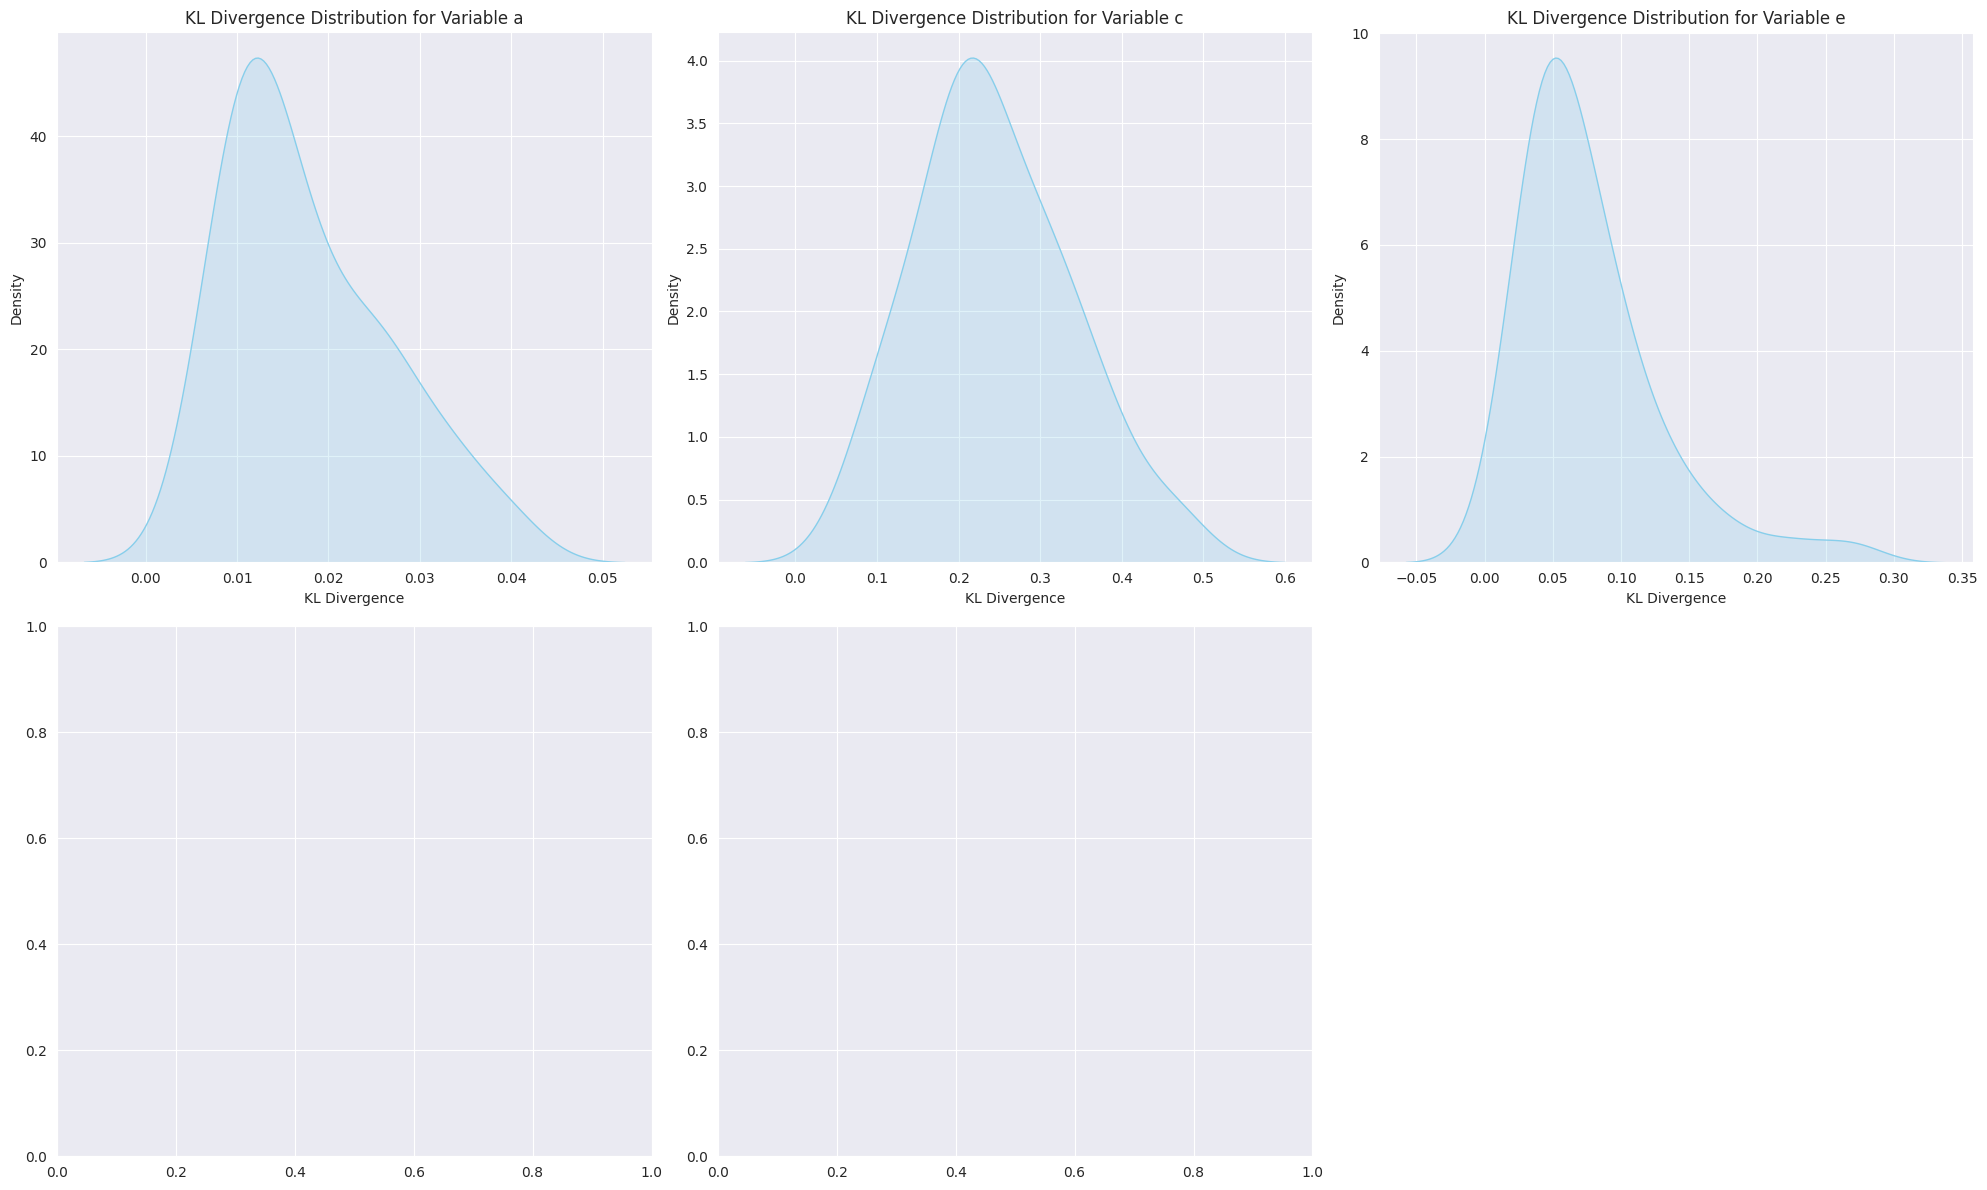

In [202]:

# %%
print(len(all_data))
# %%
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
variables = list(kl_divs[0].keys())  # Assuming kldivs is a list of dictionaries

# Create subplots for each variable
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    # Extract KL divergence values for the current variable
    kl_values = [kldiv[var] for kldiv in kl_divs]

    # Create a KDE plot for the current variable
    sns.kdeplot(kl_values, ax=axes[i], shade=True, color='skyblue')

    # Customize the subplot
    axes[i].set_title(f'KL Divergence Distribution for Variable {var}')
    axes[i].set_xlabel('KL Divergence')
    axes[i].set_ylabel('Density')

# Remove the empty subplot
fig.delaxes(axes[5])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [203]:

# %%
import numpy as np

# Calculate mean and standard deviation for each variable
for var in variables:
    kl_values = [kldiv[var] for kldiv in kl_divs]
    mean = np.mean(kl_values)
    std = np.std(kl_values)
    print(f"Variable {var}:")
    print(f"  Mean KL Divergence: {mean:.4f}")
    print(f"  Standard Deviation: {std:.4f}")
    print()


Variable a:
  Mean KL Divergence: 0.0179
  Standard Deviation: 0.0088

Variable c:
  Mean KL Divergence: 0.2430
  Standard Deviation: 0.0934

Variable e:
  Mean KL Divergence: 0.0762
  Standard Deviation: 0.0509



AUC

In [204]:

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [205]:

# Specify the path to your JSON file
json_file_path = 'data/sampled_data.json'

# Load the data
data_dict = load_data_from_json(json_file_path)

# Check if data was loaded successfully
if data_dict is not None:
    print("Data loaded successfully. You can now use data_dict in your analysis.")
else:
    print("Failed to load data. Please check the file path and format.")


Data successfully loaded from data/sampled_data.json
Data loaded successfully. You can now use data_dict in your analysis.


In [206]:
data_dict_resampled = load_data_from_json('data/resampled_data.json')

Data successfully loaded from data/resampled_data.json


In [207]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)



In [208]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [209]:
def hscm_classification_pipeline(X, y):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a KNN classifier
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Calculate and print AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score: {auc_roc:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, auc_roc


In [210]:
sizes = [150]*150

In [211]:

original_vectors = create_vector(data_dict, sizes)
new_vectors = create_vector(data_dict_resampled, sizes)

X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


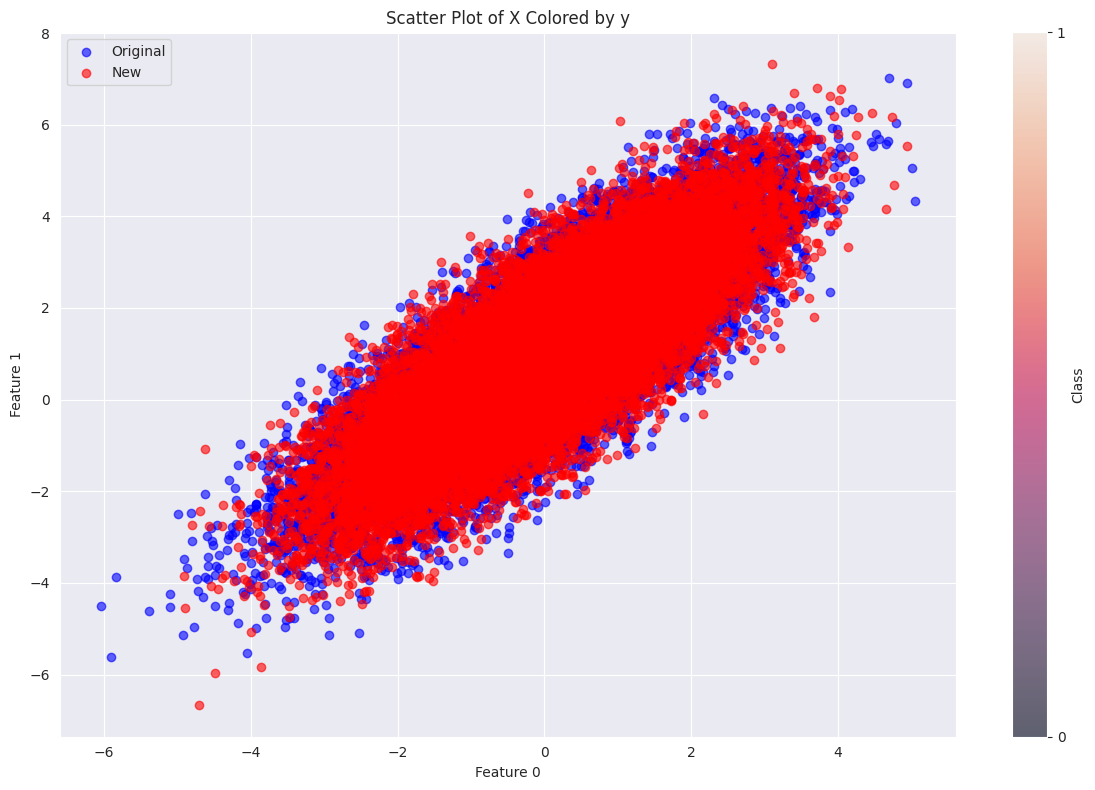

In [212]:
# Plotting X according to its color in y

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot points for y=0 (original vectors)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Original', alpha=0.6)

# Plot points for y=1 (new vectors)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='New', alpha=0.6)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of X Colored by y')
plt.legend()

# Add a colorbar
plt.colorbar(ticks=[0, 1], label='Class')

plt.tight_layout()
plt.show()


In [213]:
hscm_classification_pipeline(X, y)

Accuracy: 0.50
AUC-ROC Score: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4507
           1       0.50      0.50      0.50      4493

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



(0.5014444444444445, 0.5000840495860954)

In [215]:
def run_classification(a,k):
    list = []
    for i in range(a,k):
        print(i)
        data_dict = load_data_from_json(f'data/sampled_data_{i}.json')
        #data_dict_resampled = load_data_from_json(f'data/generated_d_{i}.json') 
        #print(data_dict, data_dict_resampled)
        original_vectors = create_vector(data_dict, sizes)
        #new_vectors = create_vector(data_dict_resampled, sizes)
        
        new_vectors_d = np.load(f'data/generated_d_{i}.npy')
        new_vectors_d = new_vectors_d.flatten()
        new_vectors_b = np.load(f'data/generated_b_{i}.npy')
        new_vectors_b = new_vectors_b.flatten()
        
        new_vectors = np.vstack((new_vectors_b, new_vectors_d)).T
        print(original_vectors.shape, new_vectors.shape)
        
        X = np.vstack((original_vectors, new_vectors))
        print(X.shape)
        y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new
        accuracy_score,auc_score= hscm_classification_pipeline(X, y)
        list.append((accuracy_score,auc_score))
    return list

In [216]:
liste = run_classification(0,50)

0
Data successfully loaded from data/sampled_data_0.json
(22500, 2) (22500, 2)
(45000, 2)
Accuracy: 0.58
AUC-ROC Score: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      4507
           1       0.58      0.55      0.57      4493

    accuracy                           0.58      9000
   macro avg       0.58      0.58      0.58      9000
weighted avg       0.58      0.58      0.58      9000

1
Data successfully loaded from data/sampled_data_1.json
(22500, 2) (22500, 2)
(45000, 2)
Accuracy: 0.58
AUC-ROC Score: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      4507
           1       0.59      0.56      0.58      4493

    accuracy                           0.58      9000
   macro avg       0.58      0.58      0.58      9000
weighted avg       0.58      0.58      0.58      9000

2
Data successfully loaded from data/sampled_data_

In [198]:
print(liste)

[(0.5914444444444444, 0.6274086292850782), (0.5927777777777777, 0.6297540176763884), (0.584, 0.6198090059575947), (0.5843333333333334, 0.6199301667446011), (0.6017777777777777, 0.6313879969388568)]


In [199]:
print(np.mean(np.array(liste), axis=0))

[0.59086667 0.62565796]


In [200]:
print(np.std(np.array(liste)))

0.01832662984548365


In [ ]:

def preprocess_data(self):
    data = {}
    for var in self.unit_vars:
        for i in range(len(self.sizes)):
            data[var + str(i)] = self.data[var + str(i)]
    for var in self.subunit_vars:
        for i in range(len(self.sizes)):
            s = 0
            for j in range(self.sizes[i]):
                s += self.data['_' + var + str(i) + '_' + str(j)]
            data[var + str(i)] = s / self.sizes[i]
    return data


class HierarchicalBayesSampler:
    def __init__(self, graph, data, unit_vars, subunit_vars, sizes):
        self.graph = nx.DiGraph(graph)
        self.data = data
        self.unit_vars = unit_vars
        self.subunit_vars = subunit_vars
        self.sizes = sizes
        self.processed_data = self.preprocess_data()

    def preprocess_data(self):
        data = {}
        for var in self.unit_vars:
            for i in range(len(self.sizes)):
                data[var + str(i)] = self.data[var + str(i)]
        for var in self.subunit_vars:
            for i in range(len(self.sizes)):
                s = 0
                for j in range(self.sizes[i]):
                    s += self.data['_' + var + str(i) + '_' + str(j)]
                data[var + str(i)] = s / self.sizes[i]
        return data

    def generate(self):  # num_samples est maintenant 2
        num_samples = self.sizes[0]
        with pm.Model() as model:
            # Hyperpriors
            mu = {var: pm.Normal(f'mu_{var}', mu=0, sigma=1) for var in self.unit_vars + self.subunit_vars}
            sigma = {var: pm.HalfNormal(f'sigma_{var}', sigma=1) for var in self.unit_vars + self.subunit_vars}

            # Priors pour les variables de niveau supérieur
            variables = {}
            for var in self.unit_vars:
                variables[var] = pm.Normal(var, mu=mu[var], sigma=sigma[var], shape=len(self.sizes))

            # Priors pour les variables de niveau inférieur (sous-unités)
            subunit_variables = {}
            for var in self.subunit_vars:
                for i in range(len(self.sizes)):
                    subunit_variables[f'{var}{i}'] = pm.Normal(f'{var}{i}', mu=mu[var], sigma=sigma[var],
                                                               shape=self.sizes[i])

            # Likelihood pour les variables de niveau supérieur
            for var in self.unit_vars:
                pm.Normal(f'obs_{var}', mu=variables[var], sigma=1,
                          observed=np.array([self.processed_data[f'{var}{i}'] for i in range(len(self.sizes))]))

            # Likelihood pour les variables de niveau inférieur (sous-unités)
            for var in self.subunit_vars:
                for i in range(len(self.sizes)):
                    pm.Normal(f'obs_{var}{i}',
                              mu=subunit_variables[f'{var}{i}'],
                              sigma=1,
                              observed=np.array([self.data[f'_{var}{i}_{j}'] for j in range(self.sizes[i])]))

            # Sampling
            trace = pm.sample(num_samples, return_inferencedata=False)

        # Extraction des échantillons
        generated_data = {}
        for var in self.unit_vars:
            generated_data[var] = trace[var][0]  # Prend le premier (et seul) échantillon

        # Extraction et génération des sous-unités
        for var in self.subunit_vars:
            for i in range(len(self.sizes)):
                generated_data[f'{var}{i}'] = trace[f'{var}{i}'][0]  # Prend le premier (et seul) échantillon

        return generated_data

    def generate_cond(self):
        num_samples = self.sizes[0]
        with pm.Model() as model:
            # Hyperpriors pour les autres variables
            mu = {var: pm.Normal(f'mu_{var}', mu=0, sigma=1) for var in self.unit_vars + ['d']}
            sigma = {var: pm.HalfNormal(f'sigma_{var}', sigma=1) for var in self.unit_vars + ['d']}

            # Priors pour les variables de niveau supérieur
            variables = {}
            for var in self.unit_vars:
                variables[var] = pm.Normal(var, mu=mu[var], sigma=sigma[var], shape=len(self.sizes))

            # b est défini comme une variable observée suivant une loi normale standard
            b = pm.Normal('b', mu=0, sigma=1, shape=(len(self.sizes), max(self.sizes)),
                          observed=np.random.normal(0, 1, (len(self.sizes), max(self.sizes))))

            # Priors pour les autres variables de niveau inférieur (d)
            subunit_variables = {}
            for i in range(len(self.sizes)):
                subunit_variables[f'd{i}'] = pm.Normal(f'd{i}', mu=mu['d'], sigma=sigma['d'], shape=self.sizes[i])

            # Likelihood pour les variables de niveau supérieur
            for var in self.unit_vars:
                pm.Normal(f'obs_{var}', mu=variables[var], sigma=1,
                          observed=np.array([self.processed_data[f'{var}{i}'] for i in range(len(self.sizes))]))

            # Likelihood pour d
            for i in range(len(self.sizes)):
                pm.Normal(f'obs_d{i}',
                          mu=subunit_variables[f'd{i}'],
                          sigma=1,
                          observed=np.array([self.data[f'_d{i}_{j}'] for j in range(self.sizes[i])]))

            # Sampling
            trace = pm.sample(num_samples, return_inferencedata=False)

        # Extraction des échantillons
        generated_data = {}
        for var in self.unit_vars:
            generated_data[var] = trace[var][0]

        # Génération de b (toujours à partir d'une loi normale standard)
        for i in range(len(self.sizes)):
            generated_data[f'b{i}'] = np.random.normal(0, 1, size=self.sizes[i])

        # Extraction de d
        for i in range(len(self.sizes)):
            generated_data[f'd{i}'] = trace[f'd{i}'][0]

        return generated_data


# Usage
n_schools = 150
n_students = 150
graph = [('a', '_b'), ('a', 'c'), ('_b', 'c'), ('c', '_d'), ('_b', '_d'), ('_d', 'e'), ('c', 'e')]

# Generate data for b and d
for i in range(n_schools):
    for j in range(n_students):
        data[f'_b{i}_{j}'] = 2 * i + j % 2 + 1  # This creates a slight variation between students
        data[f'_d{i}_{j}'] = 2 * i + j % 2 + 7  # This creates a slight variation between students

unit_vars = ['a', 'c', 'e']
subunit_vars = ['b', 'd']
sizes = [n_students] * n_schools
#sampling

sampler = HierarchicalBayesSampler(graph, data, unit_vars, subunit_vars, sizes)

generated_data = sampler.generate()
print(generated_data)

generated_data_cond = sampler.generate_cond()
print(generated_data_cond)

In [ ]:
# Compute KL divergence for 'e' variable
e_generated = generated_data['e']
e_original = np.array([sampler.processed_data[f'e{i}'] for i in range(len(sizes))])

e_generated_cond = generated_data_cond['e']

kl_div = kl_divergence(e_original, e_generated)
print(f"KL divergence between original 'e' and generated 'e': {kl_div}")
kl_div_cond = kl_divergence(e_original, e_generated_cond)
print(f"KL divergence between original 'e' and generated 'e' with conditionning: {kl_div_cond}")
